In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)


In [3]:
dataset.head()


Open    High     Low   Close      Volume
Date                                                  
2012-01-03  325.25  332.83  324.97  663.59   7,380,500
2012-01-04  331.27  333.87  329.08  666.45   5,749,400
2012-01-05  329.83  330.75  326.89  657.21   6,590,300
2012-01-06  328.34  328.77  323.68  648.24   5,405,900
2012-01-09  322.04  322.29  309.46  620.76  11,688,800

In [4]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


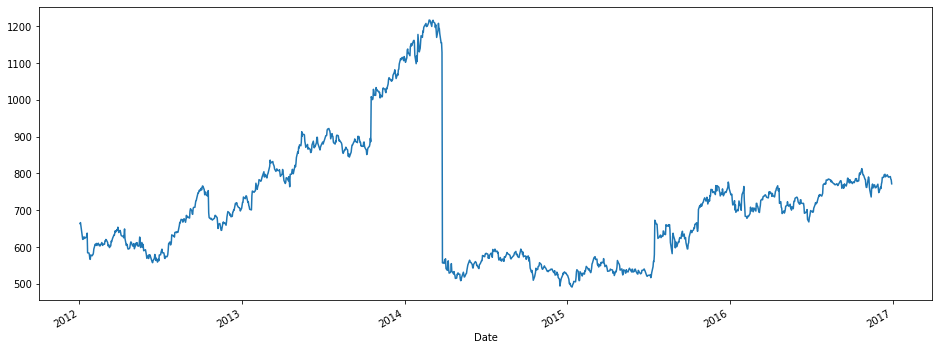

In [30]:
dataset['Close'].plot(figsize=(16,6))

In [7]:
# convert close and volume into float type
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [32]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Open'].plot()

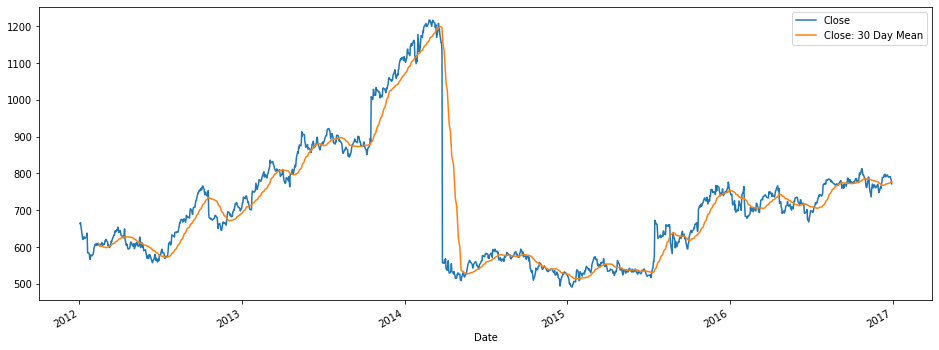

In [11]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

In [13]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [14]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [33]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(1198, 60)
(1198, 60, 1)


In [16]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



Using TensorFlow backend.


In [17]:
# Initialising the RNN
regressor = Sequential()



In [18]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [19]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0408
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0066
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0064
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 5/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0056
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

1198/1198 [==============================] - 12s 10ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0013
Epoch 100/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0014


In [20]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)



In [21]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [22]:
dataset_test.head()

Open    High     Low   Close     Volume
Date                                                 
2017-01-03  778.81  789.63  775.80  786.14  1,657,300
2017-01-04  788.36  791.34  783.16  786.90  1,073,000
2017-01-05  786.08  794.48  785.02  794.02  1,335,200
2017-01-06  795.26  807.90  792.20  806.15  1,640,200
2017-01-09  806.40  809.97  802.83  806.65  1,272,400

In [23]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [24]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [25]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [26]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


## Forecasting Stock Opening Prices
Iteratively, a days opening price is predicted from data window of previous 60 days and appending the predicted value to the known data.

In [58]:
# Getting the predicted stock price of 2017
inputs = dataset['Open'][-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs = inputs.reshape(1, -1, 1)
print(inputs.shape)
predicted_stock_price = None
for i in range(60, 80):
    prediction = regressor.predict(inputs)
    if type(predicted_stock_price) == type(None):
        predicted_stock_price = prediction
        print(predicted_stock_price.shape)
    else:
        predicted_stock_price = np.concatenate([predicted_stock_price, prediction], axis=0)
    inputs = np.concatenate([inputs, prediction.reshape(1, -1, 1)], axis=1)[:, 1:, :]
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

(1, 60, 1)
(1, 1)


(20, 1)

In [51]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
print(inputs.shape)
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

(80, 1)


IndexError: tuple index out of range

In [49]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


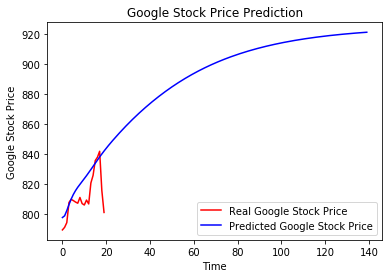

In [57]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
